In [2]:
import numpy as np
import pandas as pd
import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [ ]:
# Aggregate all X
with h5py.File("data/X/X_A.hdf5","r") as f:
    X = f["mfcc"][:]
    artist = [i.decode("utf-8") for i in f["artist"][:]]
    title = [i.decode("utf-8") for i in f["title"][:]]
    song_id = [i.decode("utf-8") for i in f["song_id"][:]]
        
files = glob.glob("data/X/X_*.hdf5")
files.remove("data/X/X_A.hdf5")

for file in files:
    with h5py.File(file,"r") as f:
        X = np.concatenate((X,f["mfcc"][:]))
        artist += [i.decode("utf-8") for i in f["artist"][:]]
        title += [i.decode("utf-8") for i in f["title"][:]]
        song_id += [i.decode("utf-8") for i in f["song_id"][:]]

In [ ]:
# Store aggregated X
with h5py.File("data/X/X.hdf5", "w") as f:
    f.create_dataset("mfcc", data=X)
    ascii_artist = [n.encode("ascii", "ignore") for n in artist]
    f.create_dataset('artist', data=ascii_artist)
    ascii_title = [n.encode("ascii", "ignore") for n in title]
    f.create_dataset('title', data=ascii_title)
    ascii_song_id = [n.encode("ascii", "ignore") for n in song_id]
    f.create_dataset('song_id', data=ascii_song_id)

In [2]:
# Load X
with h5py.File("data/X/X.hdf5","r") as f:
    X = f["mfcc"][:]
    artist = [i.decode("utf-8") for i in f["artist"][:]]
    title = [i.decode("utf-8") for i in f["title"][:]]
    song_id = [i.decode("utf-8") for i in f["song_id"][:]]

In [3]:
# Load Y
f = h5py.File("data/Y/U.hdf5", "r")
Y_temp = f["Y"][:]
songs = [i[0].decode("utf-8") for i in f["songs"][:]]
f.close()

In [4]:
# Match X and Y
indices = [songs.index(song) for song in song_id]

Y = Y_temp[indices] 
songz = []
for i in indices:
    songz.append(songs[i])

In [18]:
# Store data
with h5py.File("data/data.hdf5", "w") as f:
    f.create_dataset("X", data=X)
    ascii_artist = [n.encode("ascii", "ignore") for n in artist]
    f.create_dataset('artist', data=ascii_artist)
    ascii_title = [n.encode("ascii", "ignore") for n in title]
    f.create_dataset('song', data=ascii_title)
    f.create_dataset("Y", data=Y)

In [22]:
# Collaborative filtering sanity check
Y_1 = [i[1] for i in Y]
data = pd.DataFrame(data=[artist,Y_1]).T
data.columns = ["artist","latent"]
data.sort_values("latent",ascending=True)

,artist,latent
291754,Coldplay,-0.636524
34291,Coldplay,-0.625094
146216,Coldplay,-0.598589
108690,Coldplay,-0.598589
230386,Coldplay,-0.545357
271037,Paramore,-0.538897
355965,The Killers,-0.538329
164761,Lady GaGa,-0.523937
174766,Train,-0.487444
110697,Kings Of Leon,-0.486867


In [3]:
# Import data
with h5py.File("data/data.hdf5", "r") as f:
    X = f["X"][:]
    artist = f["artist"][:]
    song = f["song"][:]
    Y = f["Y"][:]

Num extremes: 12939
Max: 0.782019
Max: -0.454935


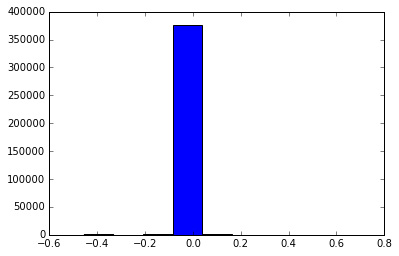

In [36]:
# Explore data
latent = [i[2] for i in Y]
extremes = [i for i in latent if i > 0.01 or i < -0.01]
print("Num extremes: "+str(len(extreme)))
print("Max: "+str(max(latent)))
print("Max: "+str(min(latent)))
plt.hist(latent);

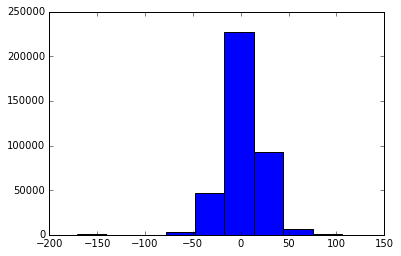

In [57]:
mfcc_features = [i[100][11] for i in X]
plt.hist(mfcc_feature);